In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost

print("Required packages installation complete!")

Required packages installation complete!


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


In [3]:
df = pd.read_csv('insurance.csv')
print(df.head())

   index  age     sex     bmi  children smoker     region      charges
0      0   19  female  27.900         0    yes  southwest  16884.92400
1      1   18    male  33.770         1     no  southeast   1725.55230
2      2   28    male  33.000         3     no  southeast   4449.46200
3      3   33    male  22.705         0     no  northwest  21984.47061
4      4   32    male  28.880         0     no  northwest   3866.85520


In [4]:
# Display basic information about the dataset
print("📊 Dataset Overview:")
print("=" * 50)
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\n🔍 First 5 rows:")
print(df.head())

print("\n📋 Dataset Info:")
print(df.info())

print("\n📈 Summary Statistics:")
print(df.describe())

print("\n🔍 Data Types:")
print(df.dtypes)

print("\n❓ Missing Values:")
print(df.isnull().sum())

print("\n🏷️ Unique Values in Categorical Columns:")
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    if col in df.columns:
        print(f"{col}: {df[col].unique()}")

📊 Dataset Overview:
Shape: (1338, 8)
Columns: ['index', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

🔍 First 5 rows:
   index  age     sex     bmi  children smoker     region      charges
0      0   19  female  27.900         0    yes  southwest  16884.92400
1      1   18    male  33.770         1     no  southeast   1725.55230
2      2   28    male  33.000         3     no  southeast   4449.46200
3      3   33    male  22.705         0     no  northwest  21984.47061
4      4   32    male  28.880         0     no  northwest   3866.85520

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6

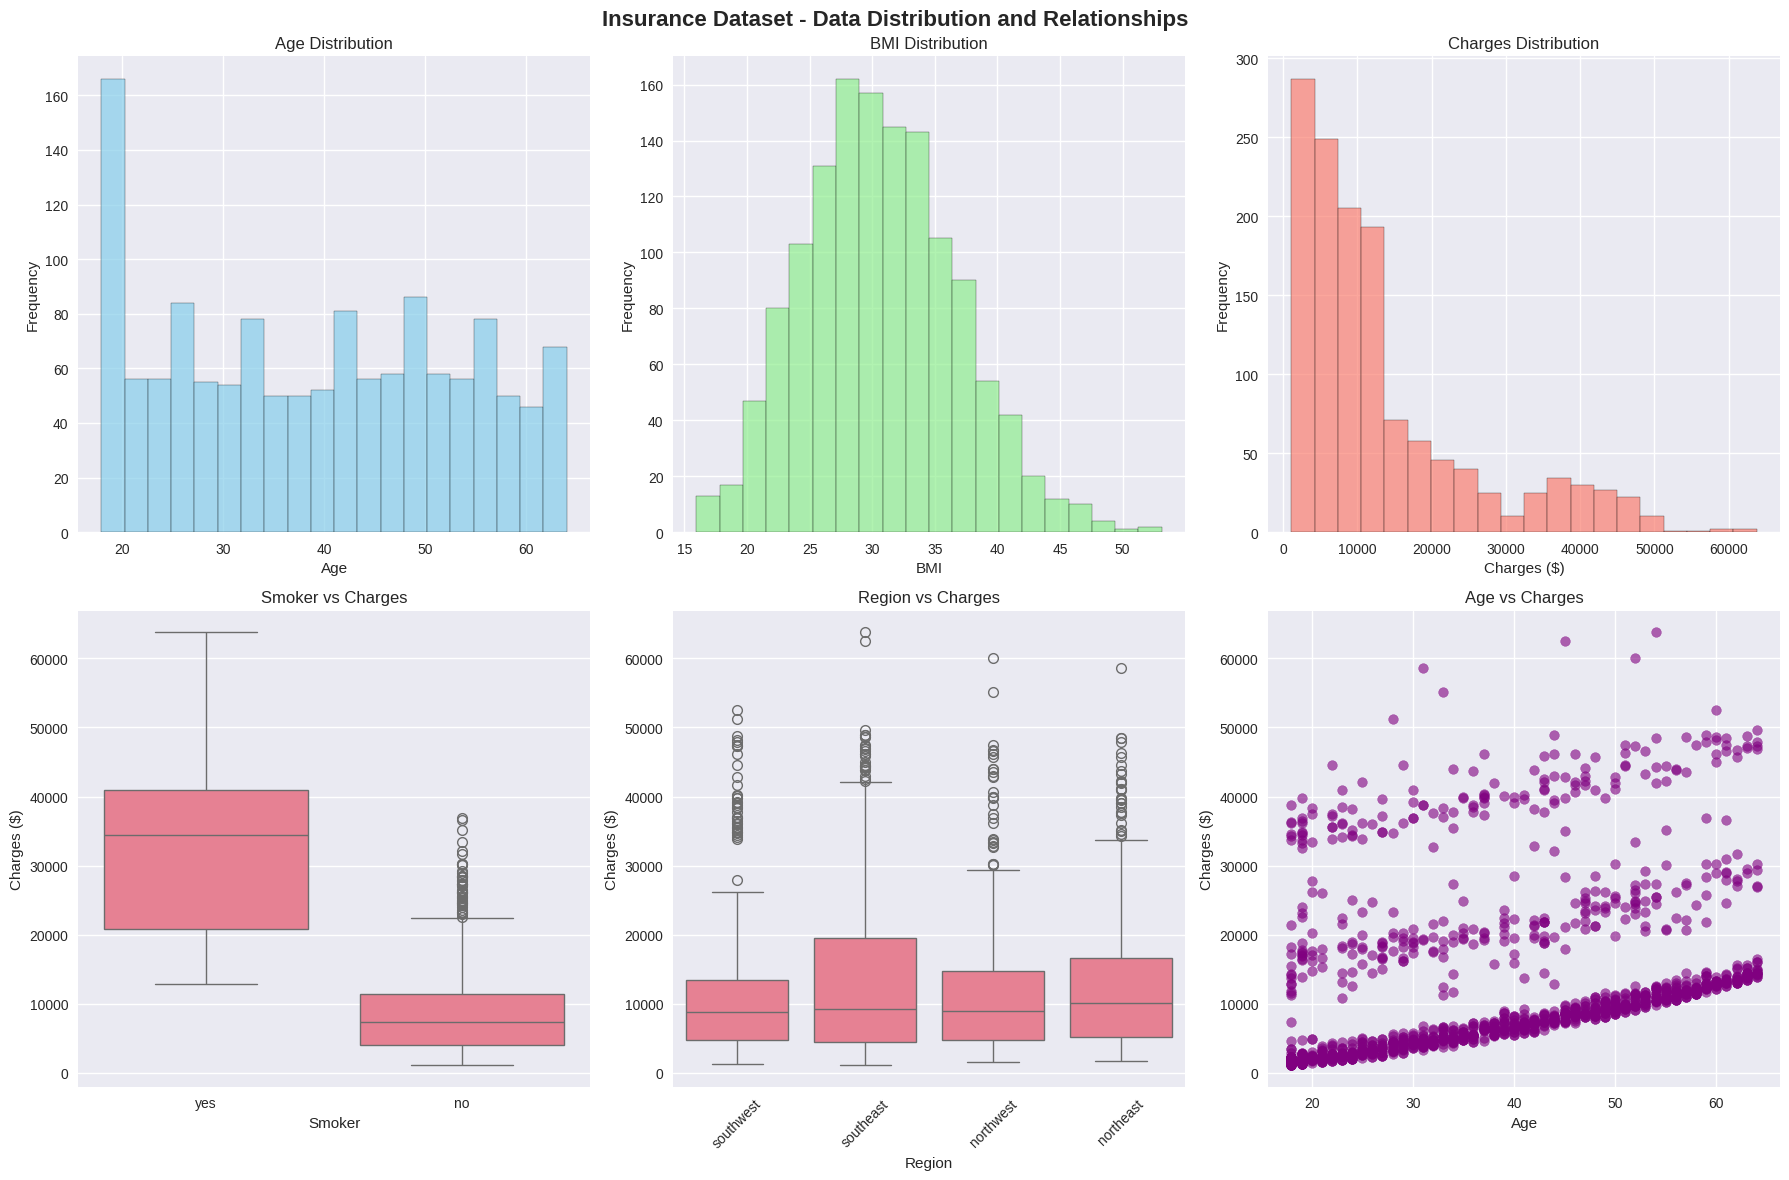

📊 Key Insights from Visualizations:
• Age range: 18 - 64 years
• BMI range: 16.0 - 53.1
• Charges range: $1121.87 - $63770.43
• Average charges: $13270.42
• Smokers: 274 (20.5%)
• Non-smokers: 1064 (79.5%)


In [5]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Insurance Dataset - Data Distribution and Relationships', fontsize=16, fontweight='bold')

# 1. Age distribution
axes[0, 0].hist(df['age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# 2. BMI distribution
axes[0, 1].hist(df['bmi'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('BMI Distribution')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Frequency')

# 3. Charges distribution
axes[0, 2].hist(df['charges'], bins=20, alpha=0.7, color='salmon', edgecolor='black')
axes[0, 2].set_title('Charges Distribution')
axes[0, 2].set_xlabel('Charges ($)')
axes[0, 2].set_ylabel('Frequency')

# 4. Smoker vs Charges
sns.boxplot(x='smoker', y='charges', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Smoker vs Charges')
axes[1, 0].set_xlabel('Smoker')
axes[1, 0].set_ylabel('Charges ($)')

# 5. Region vs Charges
sns.boxplot(x='region', y='charges', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Region vs Charges')
axes[1, 1].set_xlabel('Region')
axes[1, 1].set_ylabel('Charges ($)')
axes[1, 1].tick_params(axis='x', rotation=45)

# 6. Age vs Charges
axes[1, 2].scatter(df['age'], df['charges'], alpha=0.6, color='purple')
axes[1, 2].set_title('Age vs Charges')
axes[1, 2].set_xlabel('Age')
axes[1, 2].set_ylabel('Charges ($)')

plt.tight_layout()
plt.show()

# Additional insights
print("📊 Key Insights from Visualizations:")
print("=" * 50)
print(f"• Age range: {df['age'].min()} - {df['age'].max()} years")
print(f"• BMI range: {df['bmi'].min():.1f} - {df['bmi'].max():.1f}")
print(f"• Charges range: ${df['charges'].min():.2f} - ${df['charges'].max():.2f}")
print(f"• Average charges: ${df['charges'].mean():.2f}")
print(f"• Smokers: {(df['smoker'] == 'yes').sum()} ({(df['smoker'] == 'yes').mean()*100:.1f}%)")
print(f"• Non-smokers: {(df['smoker'] == 'no').sum()} ({(df['smoker'] == 'no').mean()*100:.1f}%)")

In [6]:
# Handle categorical variables using one-hot encoding
print("🔄 Processing categorical variables...")

# Create a copy of the dataframe
df_encoded = df.copy()

# Apply one-hot encoding to categorical columns
categorical_columns = ['sex', 'smoker', 'region']
df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns, drop_first=True)

print(f"Original shape: {df.shape}")
print(f"Encoded shape: {df_encoded.shape}")
print(f"New columns after encoding: {list(df_encoded.columns)}")

# Display the first few rows of encoded data
print("\n🔍 First 5 rows of encoded data:")
print(df_encoded.head())

# Check for any missing values after encoding
print(f"\n❓ Missing values after encoding: {df_encoded.isnull().sum().sum()}")

🔄 Processing categorical variables...
Original shape: (1338, 8)
Encoded shape: (1338, 10)
New columns after encoding: ['index', 'age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']

🔍 First 5 rows of encoded data:
   index  age     bmi  children      charges  sex_male  smoker_yes  \
0      0   19  27.900         0  16884.92400     False        True   
1      1   18  33.770         1   1725.55230      True       False   
2      2   28  33.000         3   4449.46200      True       False   
3      3   33  22.705         0  21984.47061      True       False   
4      4   32  28.880         0   3866.85520      True       False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4    

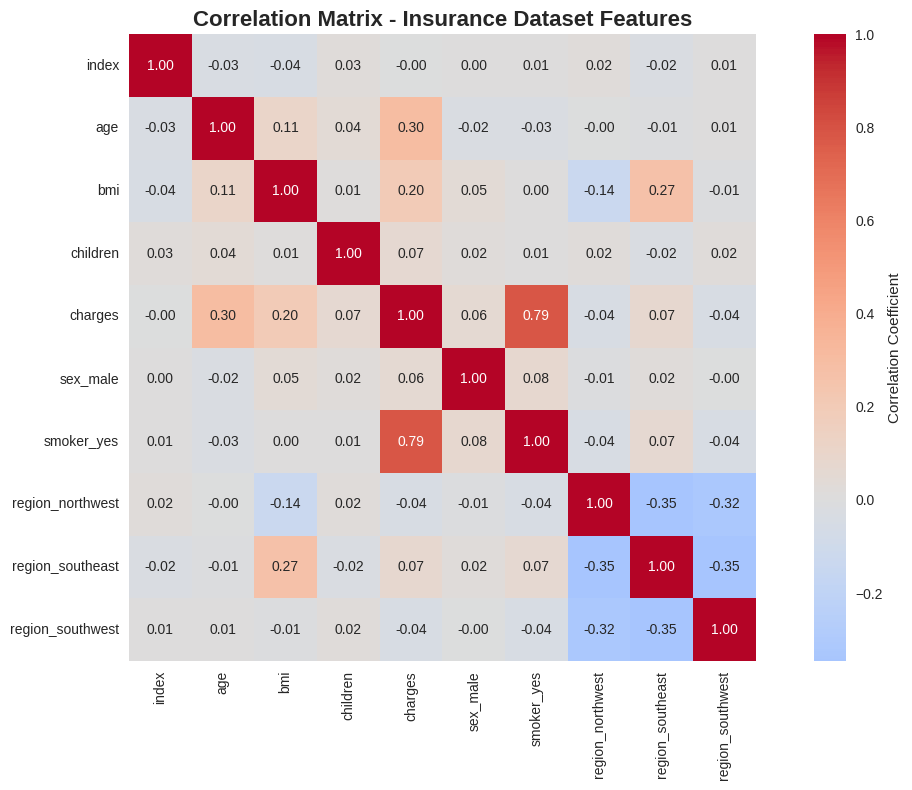

🔍 Features most correlated with charges:
smoker_yes: 0.787
age: 0.299
bmi: 0.198
region_southeast: 0.074
children: 0.068
sex_male: 0.057
region_southwest: 0.043
region_northwest: 0.040
index: 0.003

🔥 Features with correlation > 0.3 with charges:
['smoker_yes']


In [7]:
# Create correlation matrix and heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df_encoded.corr()

# Create heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix - Insurance Dataset Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Find features most correlated with charges
print("🔍 Features most correlated with charges:")
print("=" * 50)
charges_correlation = correlation_matrix['charges'].abs().sort_values(ascending=False)
for feature, corr in charges_correlation.items():
    if feature != 'charges':
        print(f"{feature}: {corr:.3f}")

# Identify strongly correlated features
print(f"\n🔥 Features with correlation > 0.3 with charges:")
strong_corr = charges_correlation[charges_correlation > 0.3]
strong_corr = strong_corr[strong_corr.index != 'charges']
print(list(strong_corr.index))

In [8]:
# Separate features and target variable
print("🎯 Preparing features and target variable...")

# Features (X) - all columns except charges
X = df_encoded.drop('charges', axis=1)

# Target variable (y) - charges column
y = df_encoded['charges']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature columns: {list(X.columns)}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=None  # Since this is regression, not classification
)

print(f"\n📊 Data Split Summary:")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Training set percentage: {(X_train.shape[0] / len(X)) * 100:.1f}%")
print(f"Test set percentage: {(X_test.shape[0] / len(X)) * 100:.1f}%")

# Display basic statistics of the split
print(f"\n📈 Target Variable Statistics:")
print(f"Training set - Mean: ${y_train.mean():.2f}, Std: ${y_train.std():.2f}")
print(f"Test set - Mean: ${y_test.mean():.2f}, Std: ${y_test.std():.2f}")

🎯 Preparing features and target variable...
Features shape: (1338, 9)
Target shape: (1338,)
Feature columns: ['index', 'age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']

📊 Data Split Summary:
Training set size: 1070 samples
Test set size: 268 samples
Training set percentage: 80.0%
Test set percentage: 20.0%

📈 Target Variable Statistics:
Training set - Mean: $13346.09, Std: $12019.51
Test set - Mean: $12968.32, Std: $12483.20


In [9]:
# Train Linear Regression Model
print("🤖 Training Linear Regression Model...")

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)

# Calculate evaluation metrics
lr_mse_train = mean_squared_error(y_train, lr_pred_train)
lr_mse_test = mean_squared_error(y_test, lr_pred_test)
lr_r2_train = r2_score(y_train, lr_pred_train)
lr_r2_test = r2_score(y_test, lr_pred_test)

print("✅ Linear Regression Model Results:")
print("=" * 50)
print(f"Training MSE: {lr_mse_train:.2f}")
print(f"Test MSE: {lr_mse_test:.2f}")
print(f"Training R² Score: {lr_r2_train:.4f}")
print(f"Test R² Score: {lr_r2_test:.4f}")
print(f"Training RMSE: {np.sqrt(lr_mse_train):.2f}")
print(f"Test RMSE: {np.sqrt(lr_mse_test):.2f}")

# Display feature coefficients
print(f"\n🔍 Feature Coefficients:")
feature_importance_lr = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(feature_importance_lr)

# Check for overfitting
if lr_r2_train - lr_r2_test > 0.1:
    print("⚠️  Potential overfitting detected!")
else:
    print("✅ No significant overfitting detected.")

🤖 Training Linear Regression Model...
✅ Linear Regression Model Results:
Training MSE: 37237484.00
Test MSE: 33806854.35
Training R² Score: 0.7420
Test R² Score: 0.7822
Training RMSE: 6102.25
Test RMSE: 5814.37

🔍 Feature Coefficients:
            Feature   Coefficient
5        smoker_yes  23638.554354
8  region_southwest   -807.798508
7  region_southeast   -652.654032
3          children    418.768027
6  region_northwest   -371.150975
2               bmi    337.793811
1               age    257.475083
4          sex_male     -9.131349
0             index      0.520453
✅ No significant overfitting detected.


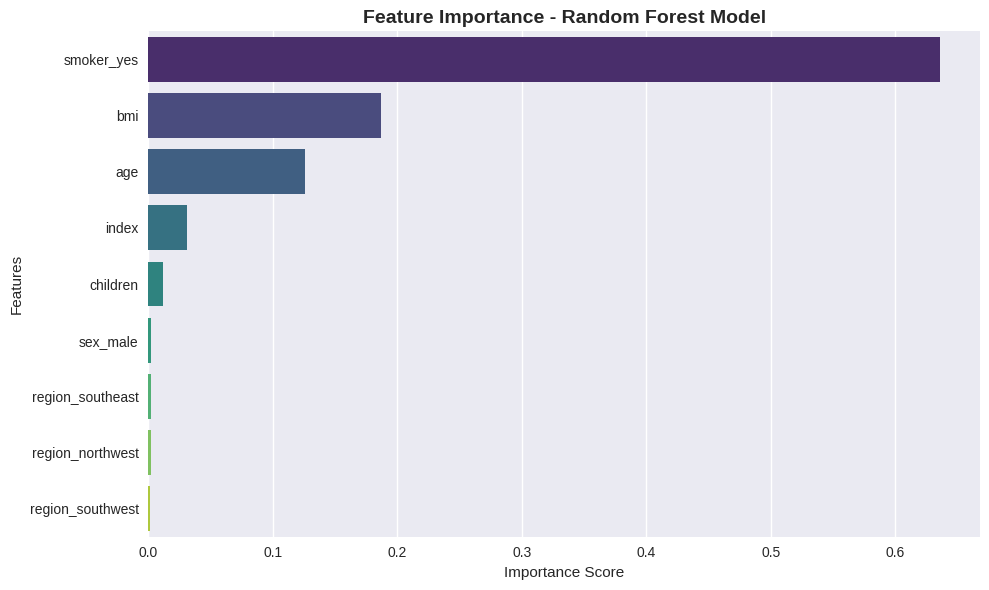

🏆 Top 5 Most Important Features:
1. smoker_yes: 0.6364
2. bmi: 0.1869
3. age: 0.1255
4. index: 0.0310
5. children: 0.0115


In [11]:
# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_rf, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - Random Forest Model', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Print top 5 most important features
print("🏆 Top 5 Most Important Features:")
print("=" * 40)
for i, (idx, row) in enumerate(feature_importance_rf.head().iterrows()):
    print(f"{i+1}. {row['Feature']}: {row['Importance']:.4f}")

In [12]:
# Train XGBoost Model
print("🚀 Training XGBoost Model...")

# Initialize the model
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_pred_train = xgb_model.predict(X_train)
xgb_pred_test = xgb_model.predict(X_test)

# Calculate evaluation metrics
xgb_mse_train = mean_squared_error(y_train, xgb_pred_train)
xgb_mse_test = mean_squared_error(y_test, xgb_pred_test)
xgb_r2_train = r2_score(y_train, xgb_pred_train)
xgb_r2_test = r2_score(y_test, xgb_pred_test)

print("✅ XGBoost Model Results:")
print("=" * 50)
print(f"Training MSE: {xgb_mse_train:.2f}")
print(f"Test MSE: {xgb_mse_test:.2f}")
print(f"Training R² Score: {xgb_r2_train:.4f}")
print(f"Test R² Score: {xgb_r2_test:.4f}")
print(f"Training RMSE: {np.sqrt(xgb_mse_train):.2f}")
print(f"Test RMSE: {np.sqrt(xgb_mse_test):.2f}")

# Feature importance
feature_importance_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n🔍 Feature Importance (XGBoost):")
print(feature_importance_xgb)

# Check for overfitting
if xgb_r2_train - xgb_r2_test > 0.1:
    print("⚠️  Potential overfitting detected!")
else:
    print("✅ No significant overfitting detected.")

🚀 Training XGBoost Model...
✅ XGBoost Model Results:
Training MSE: 3017742.75
Test MSE: 22811671.52
Training R² Score: 0.9791
Test R² Score: 0.8531
Training RMSE: 1737.17
Test RMSE: 4776.16

🔍 Feature Importance (XGBoost):
            Feature  Importance
5        smoker_yes    0.892314
2               bmi    0.029184
1               age    0.024481
6  region_northwest    0.009972
3          children    0.009692
0             index    0.009291
4          sex_male    0.009243
7  region_southeast    0.008224
8  region_southwest    0.007598
⚠️  Potential overfitting detected!


In [13]:
# Compare all models
print("🏆 Model Performance Comparison:")
print("=" * 60)

# Create comparison dataframe
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'Train_MSE': [lr_mse_train, rf_mse_train, xgb_mse_train],
    'Test_MSE': [lr_mse_test, rf_mse_test, xgb_mse_test],
    'Train_R²': [lr_r2_train, rf_r2_train, xgb_r2_train],
    'Test_R²': [lr_r2_test, rf_r2_test, xgb_r2_test],
    'Train_RMSE': [np.sqrt(lr_mse_train), np.sqrt(rf_mse_train), np.sqrt(xgb_mse_train)],
    'Test_RMSE': [np.sqrt(lr_mse_test), np.sqrt(rf_mse_test), np.sqrt(xgb_mse_test)]
})

print(results.round(4))

# Find the best model based on test R² score
best_model_idx = results['Test_R²'].idxmax()
best_model_name = results.loc[best_model_idx, 'Model']
best_r2_score = results.loc[best_model_idx, 'Test_R²']

print(f"\n🥇 Best Model: {best_model_name}")
print(f"Best Test R² Score: {best_r2_score:.4f}")

# Calculate improvement over baseline
baseline_r2 = results.loc[0, 'Test_R²']  # Linear Regression as baseline
if best_model_idx != 0:
    improvement = ((best_r2_score - baseline_r2) / baseline_r2) * 100
    print(f"Improvement over Linear Regression: {improvement:.2f}%")

🏆 Model Performance Comparison:
               Model     Train_MSE      Test_MSE  Train_R²  Test_R²  \
0  Linear Regression  3.723748e+07  3.380685e+07    0.7420   0.7822   
1      Random Forest  8.490375e+06  2.027430e+07    0.9412   0.8694   
2            XGBoost  3.017743e+06  2.281167e+07    0.9791   0.8531   

   Train_RMSE  Test_RMSE  
0   6102.2524  5814.3662  
1   2913.8247  4502.6991  
2   1737.1651  4776.1566  

🥇 Best Model: Random Forest
Best Test R² Score: 0.8694
Improvement over Linear Regression: 11.14%


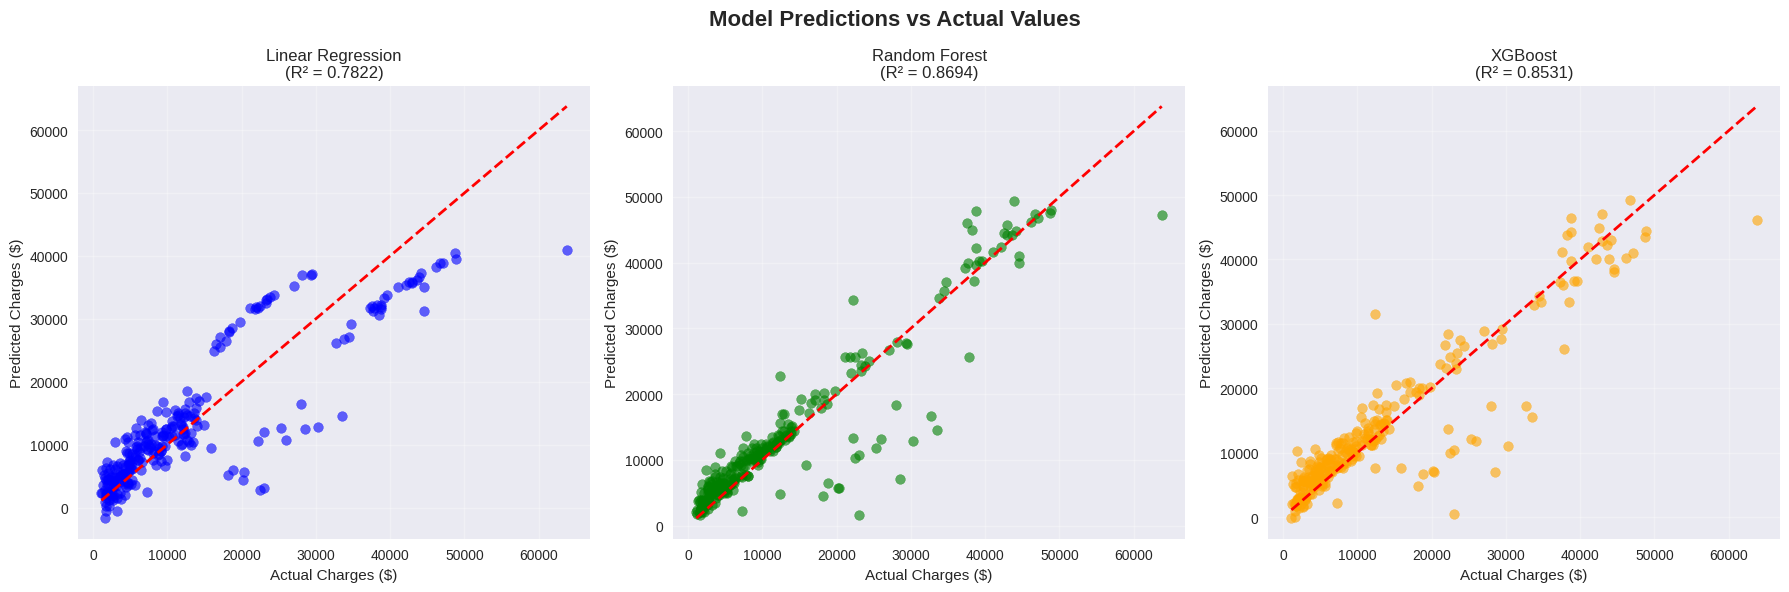

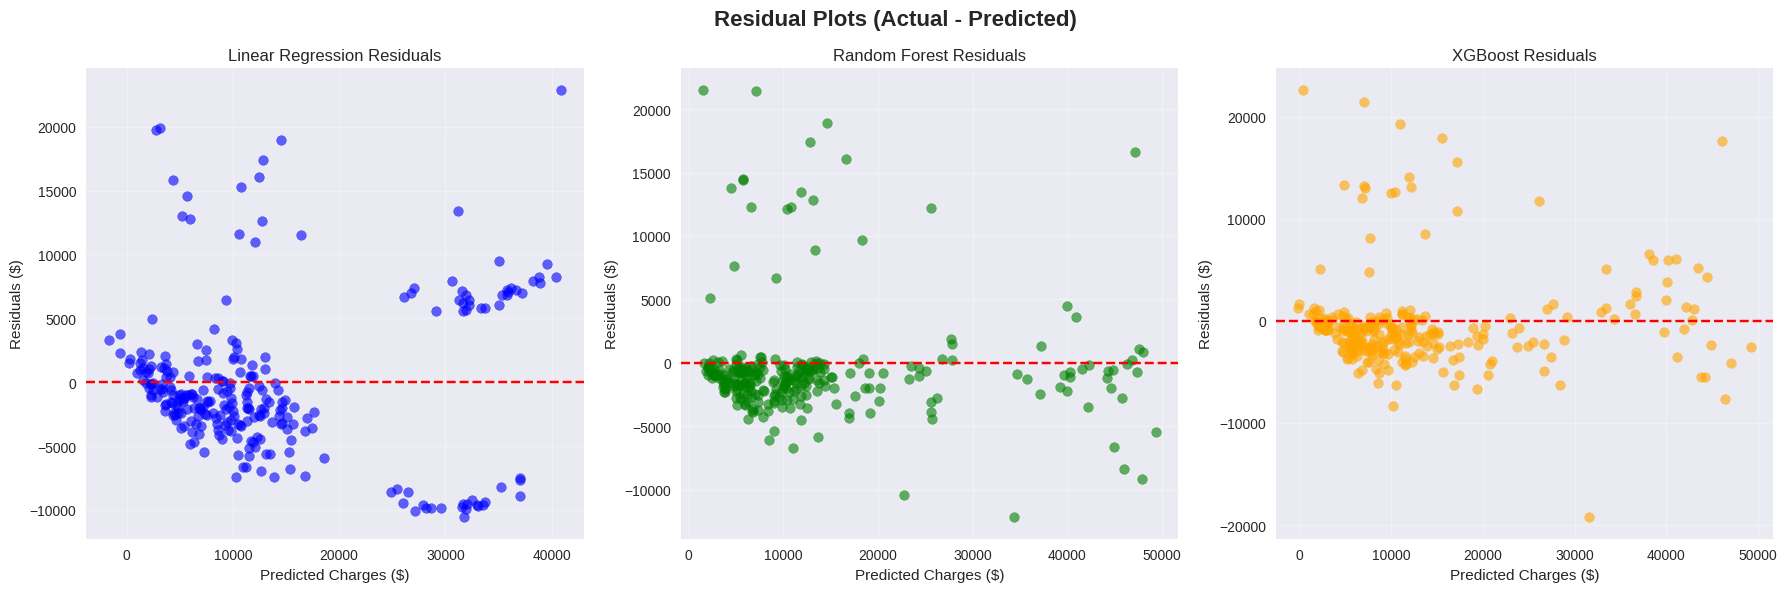

In [14]:
# Visualize predictions vs actual values
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Model Predictions vs Actual Values', fontsize=16, fontweight='bold')

# Linear Regression
axes[0].scatter(y_test, lr_pred_test, alpha=0.6, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Charges ($)')
axes[0].set_ylabel('Predicted Charges ($)')
axes[0].set_title(f'Linear Regression\n(R² = {lr_r2_test:.4f})')
axes[0].grid(True, alpha=0.3)

# Random Forest
axes[1].scatter(y_test, rf_pred_test, alpha=0.6, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Charges ($)')
axes[1].set_ylabel('Predicted Charges ($)')
axes[1].set_title(f'Random Forest\n(R² = {rf_r2_test:.4f})')
axes[1].grid(True, alpha=0.3)

# XGBoost
axes[2].scatter(y_test, xgb_pred_test, alpha=0.6, color='orange')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[2].set_xlabel('Actual Charges ($)')
axes[2].set_ylabel('Predicted Charges ($)')
axes[2].set_title(f'XGBoost\n(R² = {xgb_r2_test:.4f})')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create residual plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Residual Plots (Actual - Predicted)', fontsize=16, fontweight='bold')

# Linear Regression residuals
lr_residuals = y_test - lr_pred_test
axes[0].scatter(lr_pred_test, lr_residuals, alpha=0.6, color='blue')
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel('Predicted Charges ($)')
axes[0].set_ylabel('Residuals ($)')
axes[0].set_title('Linear Regression Residuals')
axes[0].grid(True, alpha=0.3)

# Random Forest residuals
rf_residuals = y_test - rf_pred_test
axes[1].scatter(rf_pred_test, rf_residuals, alpha=0.6, color='green')
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_xlabel('Predicted Charges ($)')
axes[1].set_ylabel('Residuals ($)')
axes[1].set_title('Random Forest Residuals')
axes[1].grid(True, alpha=0.3)

# XGBoost residuals
xgb_residuals = y_test - xgb_pred_test
axes[2].scatter(xgb_pred_test, xgb_residuals, alpha=0.6, color='orange')
axes[2].axhline(y=0, color='red', linestyle='--')
axes[2].set_xlabel('Predicted Charges ($)')
axes[2].set_ylabel('Residuals ($)')
axes[2].set_title('XGBoost Residuals')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [15]:
# Save the best model and feature columns
import pickle
import os

# Determine the best model
models = {
    'Linear Regression': (lr_model, lr_r2_test),
    'Random Forest': (rf_model, rf_r2_test),
    'XGBoost': (xgb_model, xgb_r2_test)
}

best_model_name = max(models, key=lambda x: models[x][1])
best_model = models[best_model_name][0]
best_score = models[best_model_name][1]

print(f"💾 Saving the best model: {best_model_name}")
print(f"Best model R² score: {best_score:.4f}")

# Create models directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save the best model
with open('models/best_insurance_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save feature columns
with open('models/feature_columns.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)

# Save model metadata
model_info = {
    'model_name': best_model_name,
    'r2_score': best_score,
    'mse_score': models[best_model_name][1],
    'feature_columns': X.columns.tolist(),
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
}

with open('models/model_info.pkl', 'wb') as f:
    pickle.dump(model_info, f)

print("✅ Model saved successfully!")
print(f"📁 Files saved in 'models/' directory:")
print("  - best_insurance_model.pkl")
print("  - feature_columns.pkl")
print("  - model_info.pkl")

# Test loading the model
print("\n🔍 Testing model loading...")
try:
    with open('models/best_insurance_model.pkl', 'rb') as f:
        loaded_model = pickle.load(f)

    with open('models/feature_columns.pkl', 'rb') as f:
        loaded_features = pickle.load(f)

    # Test prediction
    sample_prediction = loaded_model.predict(X_test.iloc[:1])
    print(f"✅ Model loaded successfully!")
    print(f"Sample prediction: ${sample_prediction[0]:.2f}")

except Exception as e:
    print(f"❌ Error loading model: {e}")

💾 Saving the best model: Random Forest
Best model R² score: 0.8694
✅ Model saved successfully!
📁 Files saved in 'models/' directory:
  - best_insurance_model.pkl
  - feature_columns.pkl
  - model_info.pkl

🔍 Testing model loading...
✅ Model loaded successfully!
Sample prediction: $10101.52
